![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [200]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import re 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/world-cities/worldcities.csv


In [201]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [202]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [203]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [204]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [205]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [206]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [207]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [208]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [209]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [210]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [211]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

В полях Cuisine Style, Price Range, Number of Reviews содержаться пропуски, которые мы далее заполним.

In [212]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
30299,id_2598,Amsterdam,"['Dutch', 'Mediterranean', 'European', 'Spanish']",2605.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g188590-d12497455-Reviews-E...,d12497455,1,4.0
32534,id_6136,Barcelona,"['Spanish', 'Mediterranean', 'European']",6137.0,$$ - $$$,50.0,"[['Good for food or just a few drinks', 'AVOID...",/Restaurant_Review-g187497-d997495-Reviews-Res...,d997495,1,3.5
13008,id_3100,Milan,['Italian'],3102.0,$,4.0,"[[], []]",/Restaurant_Review-g187849-d11964352-Reviews-B...,d11964352,1,5.0
18802,id_2355,Paris,"['Mediterranean', 'European', 'Greek', 'Vegeta...",2356.0,$$ - $$$,277.0,"[['Great Greek food.', 'Tasty food, tender sou...",/Restaurant_Review-g187147-d833462-Reviews-Les...,d833462,1,4.0
35303,id_2203,Amsterdam,NaN,2208.0,NaN,NaN,"[[""Esther's Cookery in Amsterdam, worth a vis....",/Restaurant_Review-g188590-d12301154-Reviews-E...,d12301154,1,5.0


In [213]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

# Cuisine Style

In [214]:
# новый признак изначально пустых значений в Cuisine Style
data['Cuisine_Style_isNAN'] = pd.isna(data['Cuisine Style']).astype('uint8')

In [215]:
# заполним пустые значения признаком неизвестно
data['Cuisine Style'].fillna(value='Unknown', inplace=True)

# Price Range

In [216]:
# новый признак изначально пустых значений в Price Range
data['Price_Range_isNAN'] = pd.isna(data['Price Range']).astype('uint8')

In [217]:
#Найдем самый частый диапазон цен - им заполним пропуски
data['Price Range'].fillna(data['Price Range'].mode()[0], inplace=True)

In [218]:
# и сразу перекодируем диапазон цен в числовой формат
price_range_codes = {"$": 1, "$$ - $$$": 2, "$$$$": 3, np.NaN: 2}
data['Price Range'].replace(price_range_codes, inplace=True)

# Number of Reviews

In [219]:
# новый признак изначально пустых значений в Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [220]:
# Заменяем на 0, если нет отзывов(считаем, что их вообще не было) и на 1 если есть только 1 отзыв
#data['temp_for_count'] = data['Reviews'].apply(
#    lambda x: np.nan if x == '[[], []]' else x)
data['temp_for_count'] = data['Reviews'].dropna().apply(
    lambda x: eval(x.replace('nan', '').replace('[,', "['',")))
data['temp_for_count'] = data['temp_for_count'].dropna().apply(lambda x: x[0])
data['rew_count'] = data['temp_for_count'].dropna().apply(
    lambda x: 2 if len(x) == 2 else 1 if len(x) == 1 else 0)
data.loc[(data['rew_count'] == 0) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 0
data.loc[(data['rew_count'] == 1) & (
    data['Number of Reviews'].isna()), 'Number of Reviews'] = 1

In [221]:
data = data.drop(['temp_for_count','rew_count'], axis = 1)

In [222]:
# Остальные пустые(кол-во отзывов > 1) заполним средним значением в разрезе города
city_num_rev = data[~data['Number of Reviews'].isna(
)][['City', 'Number of Reviews']].groupby(by='City').median()
data['Number of Reviews'] = data.apply(lambda x: city_num_rev.loc[x.City]['Number of Reviews'] if np.isnan(
    x['Number of Reviews']) else x['Number of Reviews'], axis=1)

In [223]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    49998 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Cuisine_Style_isNAN        50000 non-null uint8
Price_Range_isNAN          50000 non-null uint8
Number_of_Reviews_isNAN    50000 non-null uint8
dtypes: float64(3), int64(1), object(7), uint8(3)
memory usage: 4.3+ MB


# Reviews

In [224]:
# новый признак изначально пустых значений в Reviews ([[], []] тоже считаем пустым)
data['Reviews'] = data['Reviews'].apply(
    lambda x: np.nan if x == '[[], []]' else x)
data['Reviews_isNAN'] = pd.isna(data['Reviews']).astype('uint8')

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [225]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
#data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [226]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,1
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0,0


In [227]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN
15222,id_492,Prague,"['Italian', 'Seafood', 'Mediterranean', 'Europ...",493.0,2,95.0,"[['Cozy Italian restaurant', 'An excelent even...",/Restaurant_Review-g274707-d8114410-Reviews-L_...,d8114410,1,4.5,0,0,0,0
44832,id_2192,Stockholm,Unknown,2195.0,2,1.0,"[['Nice lunch buffet'], ['03/23/2015']]",/Restaurant_Review-g189852-d7938911-Reviews-Sh...,d7938911,1,3.0,1,1,1,0
29637,id_155,Edinburgh,"['Seafood', 'European', 'British', 'Scottish',...",156.0,2,193.0,"[['Absolutely delicious', ""It's simply the bes...",/Restaurant_Review-g186525-d8729343-Reviews-Ki...,d8729343,1,4.5,0,0,0,0
26626,id_2488,Madrid,"['International', 'Mediterranean', 'American',...",2490.0,2,1075.0,"[['Good food, good customer service', 'Good fo...",/Restaurant_Review-g187514-d2071746-Reviews-Vi...,d2071746,1,3.5,0,0,0,0
48640,id_1838,Milan,Unknown,1840.0,2,44.0,"[['Sushi in Milan !!!', 'Great food, great ser...",/Restaurant_Review-g187849-d8639378-Reviews-Ri...,d8639378,1,4.5,1,1,0,0


#### Возьмем следующий признак "Price Range".

In [228]:
data['Price Range'].value_counts()

2    40402
1     7816
3     1782
Name: Price Range, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

# Проанализируем текущие признаки и добавим новые по ним

# Restaurant_id

In [229]:
data['Restaurant_id'].value_counts()

id_871      19
id_436      19
id_633      19
id_227      19
id_344      18
            ..
id_11437     1
id_12831     1
id_15308     1
id_15252     1
id_9784      1
Name: Restaurant_id, Length: 13094, dtype: int64

Видно, что ID повторяется. Введем признак для таких ресторанов(возможно, это сетевые).

In [230]:
# добавим для ресторанов с одинаковым id новый признак is_multy
multy_list = list(data.Restaurant_id.value_counts()[
                  data.Restaurant_id.value_counts() > 1].index)
data['is_multy'] = data['Restaurant_id'].apply(
    lambda x: 1 if x in multy_list else 0)

# City

На Kaggle был найден датасет World cities database, он будет подгружен для определния доп признаков

In [231]:
data_city = pd.read_csv('/kaggle/input/world-cities/worldcities.csv')

In [232]:
data_city.head(5)

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
0,Tokyo,Tokyo,35.6897,139.6922,Japan,JP,JPN,Tōkyō,primary,37977000.0,1392685764
1,Jakarta,Jakarta,-6.2146,106.8451,Indonesia,ID,IDN,Jakarta,primary,34540000.0,1360771077
2,Delhi,Delhi,28.6600,77.2300,India,IN,IND,Delhi,admin,29617000.0,1356872604
3,Mumbai,Mumbai,18.9667,72.8333,India,IN,IND,Mahārāshtra,admin,23355000.0,1356226629
4,Manila,Manila,14.5958,120.9772,Philippines,PH,PHL,Manila,primary,23088000.0,1608618140


In [233]:
# составим список городов из справочника
city_dic_all = data_city['city_ascii'].unique()
# и список городов из нашего датасета
city_all = data['City'].unique()

In [234]:
# проверим все ли города есть в справочнике
[item for item in city_all if item not in city_dic_all]

['Oporto']

In [235]:
# судя по данным из интернета Oporto это другое название Porto(Порту)
# переименуем его в справочнике 
data_city.loc[data_city['city_ascii'] == 'Porto', 'city_ascii'] = 'Oporto'

In [236]:
[item for item in city_all if item not in city_dic_all]

['Oporto']

In [237]:
# Оставим в data_city только города из нашего датасета
data_city = data_city[(data_city['city_ascii'].isin(city_all))]

In [238]:
# проверим, что все города встречаются в справочнике только 1 раз
value_count = data_city['city_ascii'].value_counts()
value_count.loc[value_count >1].index

Index(['Paris', 'Athens', 'Vienna', 'London', 'Geneva', 'Dublin', 'Berlin',
       'Lisbon', 'Milan', 'Rome', 'Barcelona', 'Warsaw', 'Amsterdam',
       'Hamburg'],
      dtype='object')

In [239]:
# некоторых городов больше чем 1
data_city[(data_city['city_ascii'].isin(value_count.loc[value_count >1].index))]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id
33,Paris,Paris,48.8566,2.3522,France,FR,FRA,Île-de-France,primary,11020000.0,1250015082
34,London,London,51.5072,-0.1275,United Kingdom,GB,GBR,"London, City of",primary,10979000.0,1826645935
163,Barcelona,Barcelona,41.3825,2.1769,Spain,ES,ESP,Catalonia,admin,4588000.0,1724594040
215,Berlin,Berlin,52.5167,13.3833,Germany,DE,DEU,Berlin,primary,3644826.0,1276451290
280,Rome,Rome,41.8931,12.4828,Italy,IT,ITA,Lazio,primary,2872800.0,1380382862
408,Vienna,Vienna,48.2083,16.3731,Austria,AT,AUT,Wien,primary,1840573.0,1040261752
410,Hamburg,Hamburg,53.5500,10.0000,Germany,DE,DEU,Hamburg,admin,1841179.0,1276041799
422,Warsaw,Warsaw,52.2167,21.0333,Poland,PL,POL,Mazowieckie,primary,1790658.0,1616024847
536,Milan,Milan,45.4669,9.1900,Italy,IT,ITA,Lombardy,admin,1351562.0,1380724377
601,Dublin,Dublin,53.3425,-6.2658,Ireland,IE,IRL,Dublin,primary,1173179.0,1372595407


In [240]:
# В задании указано "вы будете работать с датасетом, содержащим сведения о 40 000 ресторанах Европы"
# следовательно удаляем, те из них у которых не веропейские страны - это Венесуэла, Канада и США
data_city = data_city[(data_city.country != 'United States') & (
    data_city.country != 'Canada') & (data_city.country != 'Venezuela')]

In [241]:
# проверим, что остались все города и jyb в единственном экземпляре
city_dic_all = data_city['city_ascii'].unique()
[item for item in city_all if item not in city_dic_all]

[]

In [242]:
data_city['city_ascii'].value_counts()

Krakow        1
Zurich        1
Helsinki      1
Bratislava    1
Athens        1
Hamburg       1
Lyon          1
Edinburgh     1
Warsaw        1
Geneva        1
Vienna        1
Budapest      1
Ljubljana     1
Oslo          1
Prague        1
Amsterdam     1
Dublin        1
Milan         1
Barcelona     1
Oporto        1
Berlin        1
Rome          1
Munich        1
Brussels      1
Luxembourg    1
Paris         1
Copenhagen    1
Lisbon        1
Stockholm     1
London        1
Madrid        1
Name: city_ascii, dtype: int64

In [243]:
data_city['capital']

33      primary
34      primary
163       admin
215     primary
238     primary
280     primary
408     primary
410       admin
422     primary
429     primary
498       admin
536       admin
545     primary
601     primary
651     primary
685     primary
717     primary
737     primary
739     primary
741     primary
748     primary
752     primary
770     primary
780     primary
789     primary
984       admin
1309      admin
1395        NaN
1516      admin
2343      admin
2585      admin
Name: capital, dtype: object

In [244]:
# Эдинбург столица Шотландии - пометим его как столицу
data_city[data_city['city_ascii'].isna()]['capital'] = 'primary'

In [245]:
data_city[data_city['population'].isna()]

,city,city_ascii,lat,lng,country,iso2,iso3,admin_name,capital,population,id


In [246]:
# Добавим числовой признак столицы 
data_city['is_capital'] = data_city['capital'].apply(lambda x: 1 if x == 'primary' else 0)

In [247]:
# Добавим признак величины населения
# Функция для формирования атрибута величины населения
def population_val(population):
    if population <= 250000:
        return 1
    elif population <= 500000:
        return 2
    elif population <= 1000000:
        return 3
    elif population > 1000000:
        return 4

data_city['population_attr'] = data_city['population'].apply(lambda x: population_val(x))

In [248]:
# Оставим в справочнике только нужные атрибуты и добавим в наш датасет
data_city = data_city.drop(['city','lat','lng','country','iso2','iso3','admin_name','capital','population','id'], axis = 1)
data = data.join(data_city.set_index('city_ascii'), on='City')

In [249]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN,is_multy,is_capital,population_attr
0,id_0,Paris,"['Bar', 'Pub']",12963.0,2,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,1,1,1,4
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0,0,1,1,3
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,0,1,0,2
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0,0,1,1,4
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0,0,1,1,2


# Cuisine Style

In [250]:
data['Cuisine Style'].head(5)

0                                       ['Bar', 'Pub']
1    ['European', 'Scandinavian', 'Gluten Free Opti...
2                              ['Vegetarian Friendly']
3    ['Italian', 'Mediterranean', 'European', 'Vege...
4    ['Italian', 'Mediterranean', 'European', 'Seaf...
Name: Cuisine Style, dtype: object

In [251]:
# обработаем значения
cuisine_patttern = re.compile('\w+\s*\w*\s*\w*')
data['Cuisine Style'] = data['Cuisine Style'].dropna().str.replace(
    '&', 'and', regex=False).apply(lambda x: cuisine_patttern.findall(x))

In [252]:
# Добавим новый атрибут - Количество различных кухонь
data['cuisine_style_count'] = data['Cuisine Style'].str.len()

In [253]:
# Добавим новый атрибут - Большой ассортимент кухонь
big_cuisine_range_value = data['cuisine_style_count'].mean()
data['big_cuisine_range'] = data['cuisine_style_count'].apply(lambda x: 1 if x > big_cuisine_range_value else 0)

# Ranking

In [254]:
data.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN,is_multy,is_capital,population_attr,cuisine_style_count,big_cuisine_range
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,NaN,/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,0,0,0,1,1,1,4,2,0
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,0,0,0,0,1,1,3,5,1
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,0,0,0,0,1,0,2,1,0
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,0,0,0,0,1,1,4,5,1
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,0,0,0,0,1,1,2,6,1


In [255]:
# Добавляем атрибут - нормированное место ресторана в разрезе города(макс значение = 1)
city_max_rank = data.groupby('City')['Ranking'].max()
data['rank_in_city'] = data.apply(
    lambda x: x['Ranking']/city_max_rank.loc[x['City']], axis=1)

# Reviews

Обработаем отзывы - выделим даты и попробуем выделить слова характерные для положительных и отрицательных отзывов

In [256]:
data['Reviews'][1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

In [257]:
# Для анализа нужны только числовые данные
# Сформируем атрибуты Разница в днях между отзывами(может косвенно показывать популярность)
# 
pattern = re.compile('\d\d/\d\d/\d{4}')
data['Reviews'].fillna('[[], []]',inplace=True)
data['dates']   = data['Reviews'].apply(pattern.findall)
# выделяем даты из отзывов
data['date_first'] = data['dates'].dropna().apply(
    lambda x: x[1] if len(x) == 2 else np.nan)
data['date_second'] = data['dates'].dropna().apply(
    lambda x: x[0] if len(x) > 0 else np.nan)
# переводим в формат дат
data['date_second'] = pd.to_datetime(data['date_second'])
data['date_first'] = pd.to_datetime(data['date_first'])
# пустые заполню хардкодом
data['date_second'].fillna(pd.to_datetime('2018-01-01'), inplace=True)
data['date_first'].fillna(pd.to_datetime('2018-01-02'), inplace=True)
# найдем разницу между макимальной датой написания ревью в общем и по конкретному ресторану
data['max_date'] = data.apply(lambda x: x['date_second'] if x['date_second'] > x['date_first'] else x['date_first'], axis =1)
data['max_date'] = pd.to_datetime(data['max_date'])
max_date_all = data['max_date'].max()
data['max_date_diff'] = (max_date_all- data['max_date']).dt.days
# находим разницу в днях(модуль, т.к. дата может быть больше как в 1-м, так и во 2-м)
data['dates_diff'] = abs(data['date_second'] - data['date_first']).dt.days

In [258]:
data.head(10)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,population_attr,cuisine_style_count,big_cuisine_range,rank_in_city,dates,date_first,date_second,max_date,max_date_diff,dates_diff
0,id_0,Paris,"[Bar, Pub]",12963.0,2,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,...,4,2,0,0.926855,[],2018-01-02,2018-01-01,2018-01-02,55,1
1,id_1,Helsinki,"[European, Scandinavian, Gluten Free Options, ...",106.0,2,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,...,3,5,1,0.092901,"[12/05/2017, 10/29/2017]",2017-10-29,2017-12-05,2017-12-05,83,37
2,id_2,Edinburgh,[Vegetarian Friendly],810.0,2,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,...,2,1,0,0.458664,"[12/28/2017, 12/06/2017]",2017-12-06,2017-12-28,2017-12-28,60,22
3,id_3,London,"[Italian, Mediterranean, European, Vegetarian ...",1669.0,3,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,...,4,5,1,0.101496,"[12/06/2017, 11/22/2017]",2017-11-22,2017-12-06,2017-12-06,82,14
4,id_4,Bratislava,"[Italian, Mediterranean, European, Seafood, Ve...",37.0,3,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,...,2,6,1,0.041620,"[02/08/2018, 01/24/2018]",2018-01-24,2018-02-08,2018-02-08,18,15
5,id_5,Paris,"[French, Cafe, Fast Food]",5093.0,1,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,...,4,3,1,0.364150,"[09/07/2017, 09/02/2017]",2017-09-02,2017-09-07,2017-09-07,172,5
6,id_6,Lisbon,"[European, Portuguese]",3704.0,1,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,...,3,2,0,0.996503,[],2018-01-02,2018-01-01,2018-01-02,55,1
7,id_7,Budapest,[Unknown],2330.0,2,0.0,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,...,4,1,0,0.954918,[],2018-01-02,2018-01-01,2018-01-02,55,1
8,id_8,Helsinki,"[European, Scandinavian]",771.0,2,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,...,3,2,0,0.675723,"[01/07/2018, 10/11/2017]",2017-10-11,2018-01-07,2018-01-07,50,88
9,id_9,Stockholm,[Italian],605.0,2,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,...,3,1,0,0.245536,"[12/02/2017, 10/29/2017]",2017-10-29,2017-12-02,2017-12-02,86,34


In [259]:
data = data.drop(['dates','date_first', 'date_second', 'max_date'], axis = 1)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null object
ID_TA                      50000 non-null object
sample                     50000 non-null int64
Rating                     50000 non-null float64
Cuisine_Style_isNAN        50000 non-null uint8
Price_Range_isNAN          50000 non-null uint8
Number_of_Reviews_isNAN    50000 non-null uint8
Reviews_isNAN              50000 non-null uint8
is_multy                   50000 non-null int64
is_capital                 50000 non-null int64
population_attr            50000 non-null int64
cuisine_style_

Просмотрев самые часто повторяющиеся слова в отзывах выделил часть, которые указывают на эмоциональный окрас.

In [261]:
# Составляем списки положительных и отрицательных слов из отзывов(обработал сколько успел из самых популярных слов в отзывах)
very_good_words = [
    'superb',
    'fabulous',
    'favourite',
    'favorite',
    'brilliant',
    'wow',
    'delightful',
    'incredible',
    'great',
    'best',
    'excellent',
    'amazing',
    'fantastic',
    'perfect',
    'wonderful',
    'awesome']


good_words = [
    'good',
    'nice',
    'delicious',
    'friendly',
    'lovely',
    'tasty',
    'quick',
    'fresh',
    'decent',
    'cozy',
    'cosy ',
    'pleasant',
    'love',
    'beautiful',
    'well',
    'cool',
    'yummy',
    'healthy',
    'fine',
    'charming',
    'enjoyable']


bad_words = [
    'bad',
    'expensive',
    'poor',
    'disappointing',
    'disappointed',
    'slow',
    'typical',
    'late',
    'overpriced',
    'rude']


very_bad_words = [
    'worst',
    'terrible',
    'avoid',
    'awful',
    'horrible']


In [262]:
# Создадим атрибут, оценивающий тональность отзывов
data['review_score'] = 0

In [263]:
# Заполним атрибут (решил прибавлять и вычитать 1 или 2)
for word in very_good_words:
    data.loc[data['Reviews'].str.contains(word), 'review_score'] += 2
for word in good_words:
    data.loc[data['Reviews'].str.contains(word), 'review_score'] += 1
for word in very_bad_words:
    data.loc[data['Reviews'].str.contains(word), 'review_score'] -= 2
for word in bad_words:
    data.loc[data['Reviews'].str.contains(word), 'review_score'] -= 1

# URL_TA

In [264]:
data['URL_TA'][0]

'/Restaurant_Review-g187147-d10746918-Reviews-Le_Perchoir-Paris_Ile_de_France.html'

In [265]:
# Из полезного в этом поле есть 2 числа
# Причем второе есть в поле ID_TA, здесь обработаем только первое из них
pattern = re.compile('[g]\d+')
data['URL_TA'] = data['URL_TA'].apply(pattern.findall)
data['URL_TA'] = data['URL_TA'].apply(lambda x: str(x[0]))
data['URL_TA'] = data['URL_TA'].apply(lambda x: int(x[1:]))

Решил оставить обработанное число из этого поля, т.к. оно повысило MAE на 0.002

# ID_TA

In [266]:
# На всякий случай сохраню ввиде числа и данные из этого поля
data['ID_TA'] = data['ID_TA'].apply(lambda x: int(x[1:]))

В итоге решил оставить и это поле, т.к. оно в итоге дает улучшение MAE на 0.004

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 24 columns):
Restaurant_id              50000 non-null object
City                       50000 non-null object
Cuisine Style              50000 non-null object
Ranking                    50000 non-null float64
Price Range                50000 non-null object
Number of Reviews          50000 non-null float64
Reviews                    50000 non-null object
URL_TA                     50000 non-null int64
ID_TA                      50000 non-null int64
sample                     50000 non-null int64
Rating                     50000 non-null float64
Cuisine_Style_isNAN        50000 non-null uint8
Price_Range_isNAN          50000 non-null uint8
Number_of_Reviews_isNAN    50000 non-null uint8
Reviews_isNAN              50000 non-null uint8
is_multy                   50000 non-null int64
is_capital                 50000 non-null int64
population_attr            50000 non-null int64
cuisine_style_co

![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

Посмотрим на наши данные

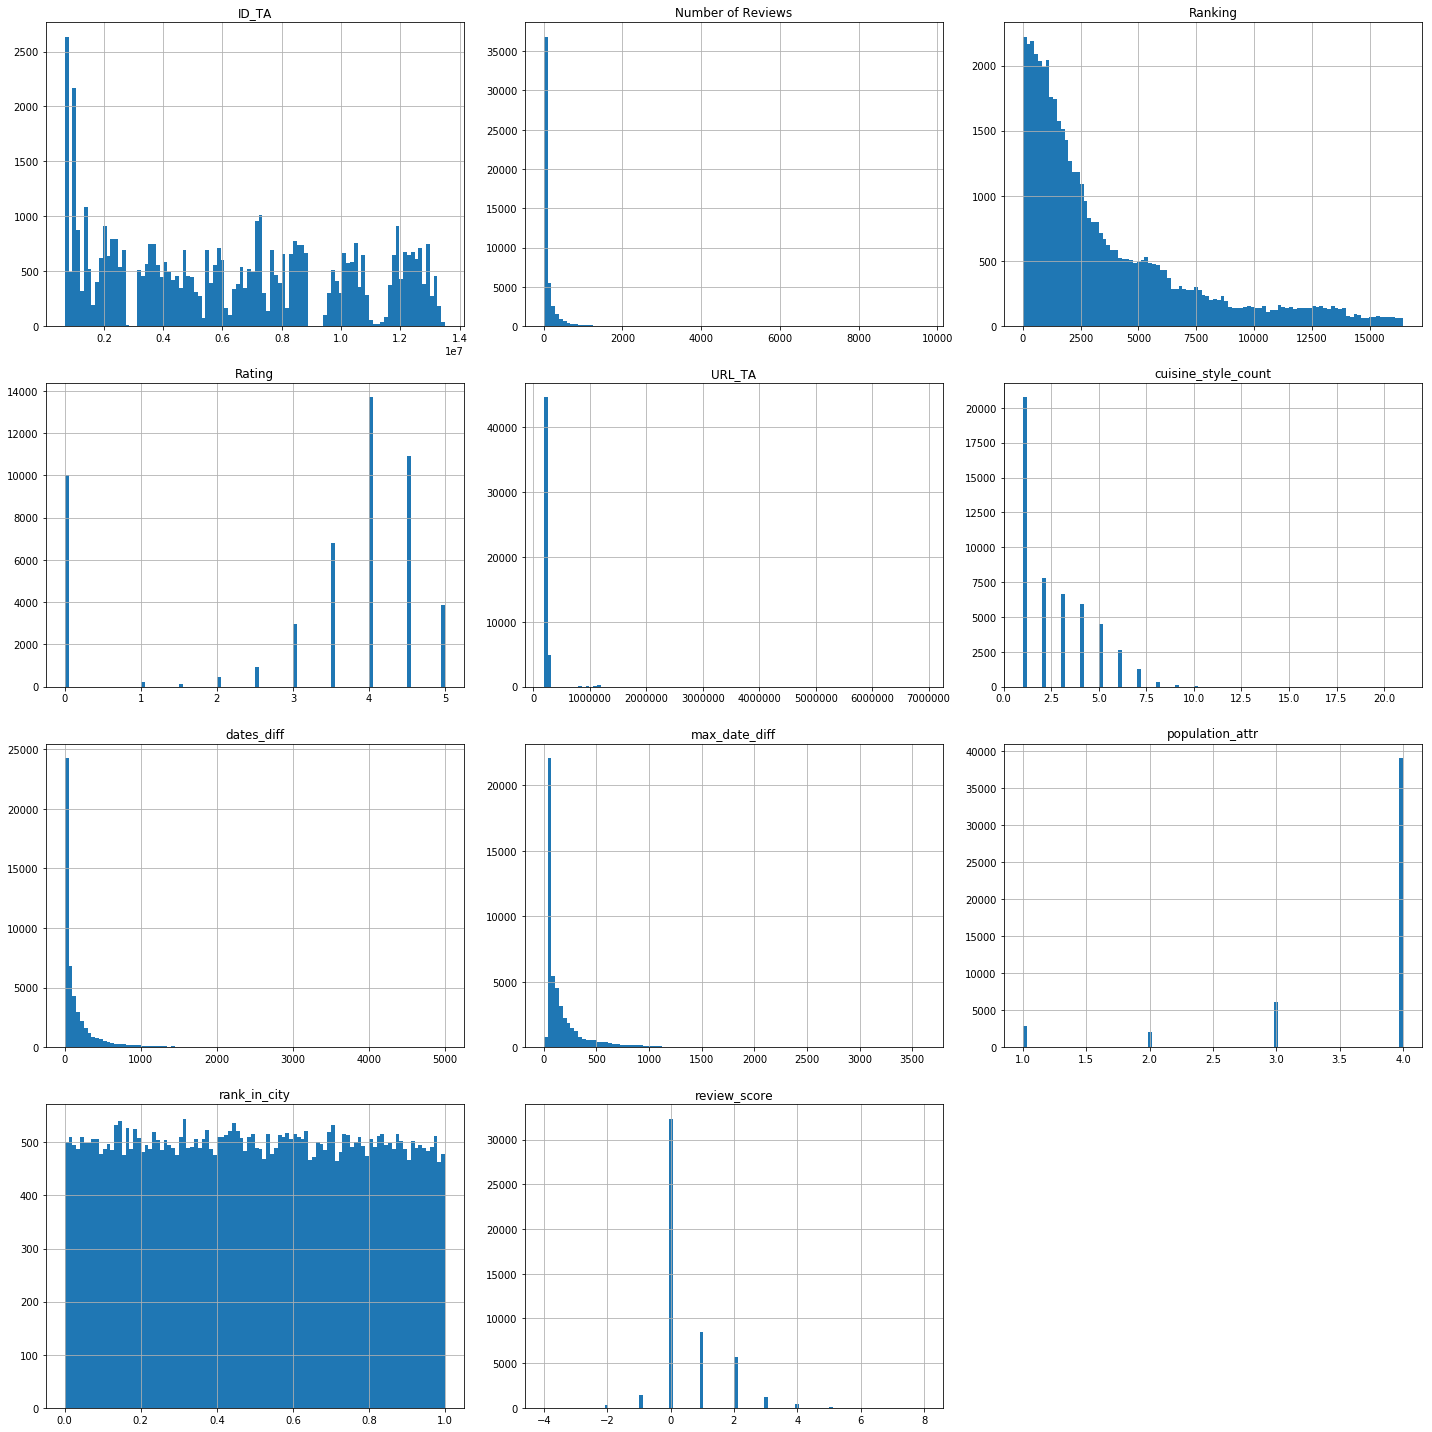

In [268]:
data[['Restaurant_id',  'Cuisine Style', 'Ranking', 'Number of Reviews', 'Reviews', 'Rating',
      'population_attr', 'cuisine_style_count', 'rank_in_city', 'dates_diff', 'max_date_diff', 'review_score', 'URL_TA','ID_TA']].hist(figsize=(20, 20), bins=100)
plt.tight_layout()

### Посмотрим распределение признака

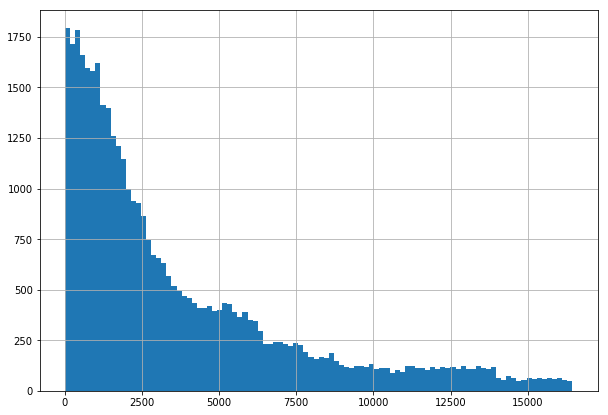

In [269]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

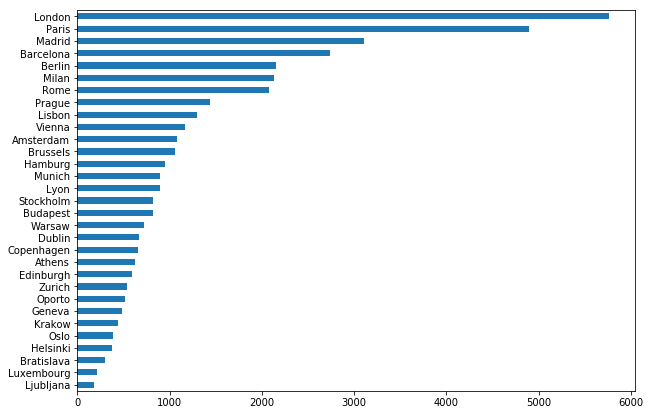

In [270]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

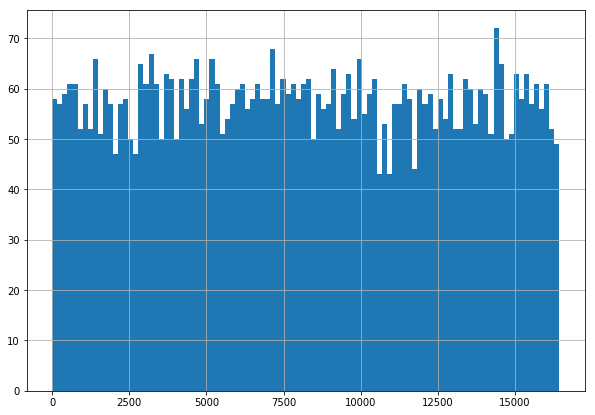

In [271]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

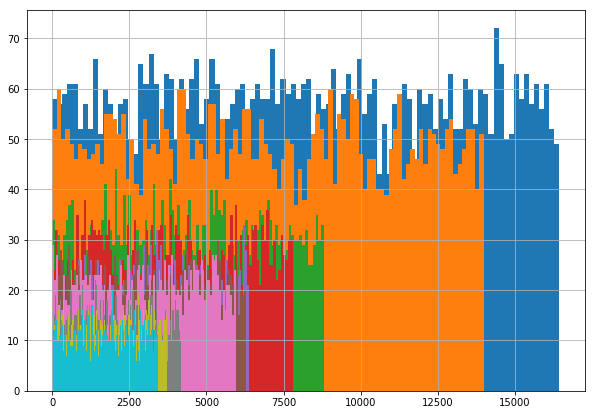

In [272]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


Был добавлен атрибут - нормированное место ресторана в разрезе города rank_in_city

### Посмотрим распределение целевой переменной

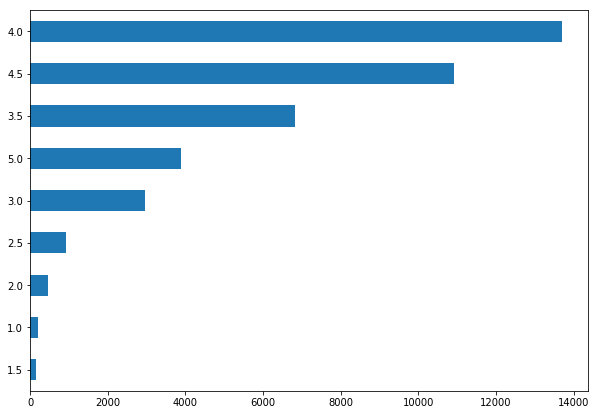

In [273]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

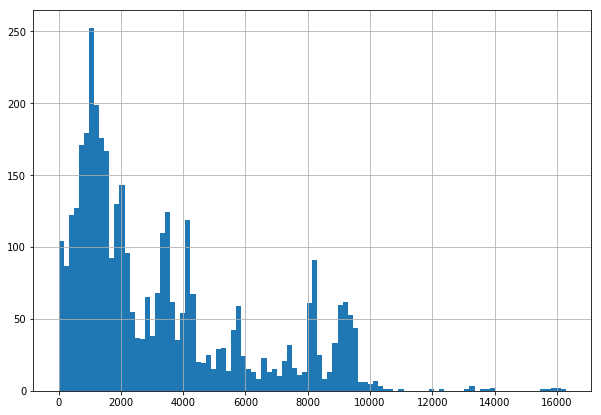

In [274]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

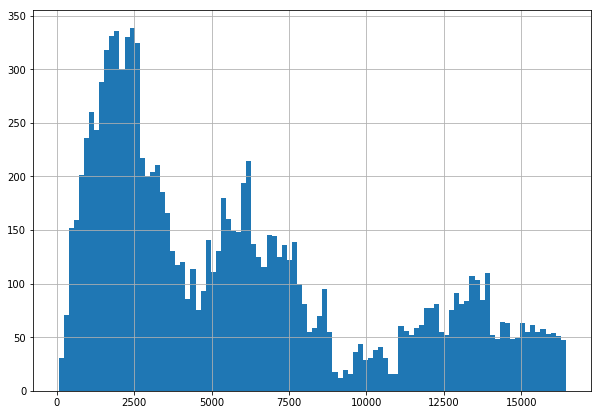

In [275]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

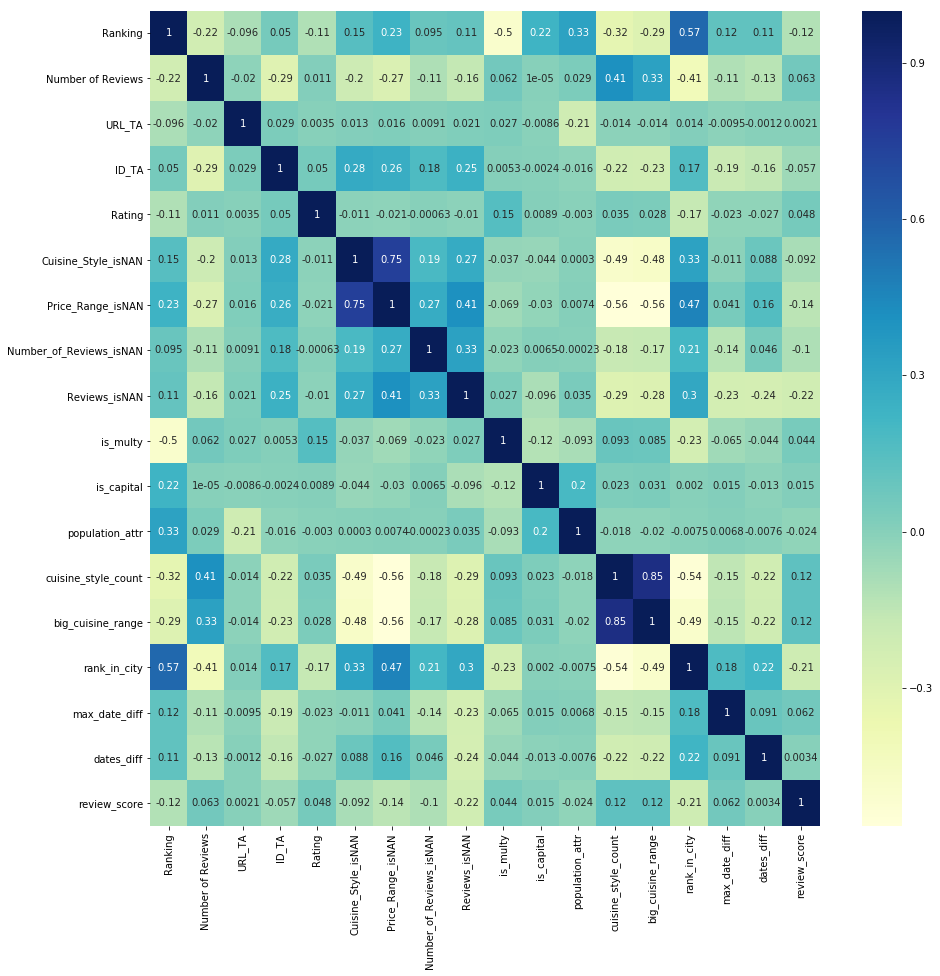

In [276]:
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True, cmap="YlGnBu")

Как видно самая большая корреляция рейтинга с созданным атрибутом нормализованного Ranking(rank_in_city).

In [277]:
# Также видно, что сильно скоррелированы новые атрибуты количества кухонь и большого выбора кухонь
# Удалим признак большого выбора кухонь
#data = data.drop(['big_cuisine_range'], axis = 1)

Хотел удалить признак big_cuisine_range, но без него MAE стал хуже на 0,001, поэтому его оставил

# Добавим dummy поля

In [278]:
# Добавим dummy для городов
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)
# Добавим dummy для диапазона цен
data = pd.get_dummies(data, columns=[ 'Price Range'],prefix = 'Price Range', dummy_na=True)

In [279]:
# Также добавим dummy для кухонь
# функция, с помощью которой мы будем создавать новые поля для Cuisine Style и заполнять их значениями
def find_item(cell):
    if item in cell:
        return 1
    return 0

# список кухонь
cuisine_style_all = list(data.explode('Cuisine Style')['Cuisine Style'].unique())

# добавляем новые поля для кухонь    
for item in cuisine_style_all:
    data[item] = data['Cuisine Style'].apply(find_item)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [280]:
# на всякий случай, заново подгружаем данные
# df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
# df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
# df_train['sample'] = 1 # помечаем где у нас трейн
# df_test['sample'] = 0 # помечаем где у нас тест
# df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

# data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 184 entries, Restaurant_id to Latvian
dtypes: float64(4), int64(137), object(3), uint8(40)
memory usage: 56.8+ MB


In [281]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    # ....
    
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)
    # тут ваш код не Encoding фитчей
    # ....
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [282]:
#df_preproc = preproc_data(data)
# просто скопируем наш dataframe
df_preproc = data.copy(deep=True)
object_columns = [s for s in df_preproc.columns if df_preproc[s].dtypes == 'object']
df_preproc.drop(object_columns, axis = 1, inplace=True)
df_preproc.sample(10)

,Ranking,Number of Reviews,URL_TA,ID_TA,sample,Rating,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN,...,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
25788,6132.0,19.0,186338,10376236,1,5.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
982,11243.0,10.0,187147,1998678,0,0.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
25391,6935.0,22.0,187497,1156240,1,3.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5848,1323.0,109.0,187309,1052181,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45755,2341.0,70.0,187309,796195,1,3.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28829,4323.0,4.0,187323,5824141,1,4.5,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
45745,1413.0,10.0,186605,8761324,1,4.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33287,9170.0,1.0,186338,12666409,1,5.0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
26288,2189.0,52.0,187323,7082922,1,4.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4414,9513.0,3.0,186338,7312557,0,0.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 181 entries, Ranking to Latvian
dtypes: float64(4), int64(137), uint8(40)
memory usage: 55.7 MB


In [284]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [285]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [286]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 180), (40000, 180), (40000, 179), (32000, 179), (8000, 179))

In [287]:
X_train.head(10)

,Ranking,Number of Reviews,URL_TA,ID_TA,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN,is_multy,is_capital,...,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
24307,2715.0,9.0,188644,10028035,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
27812,2116.0,61.0,188590,1166702,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
21020,9959.0,14.0,187147,5799869,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
25158,1224.0,55.0,187497,10832917,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34990,2583.0,12.0,187514,10226705,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
15980,3980.0,119.0,187147,783206,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
40334,901.0,50.0,189180,12652253,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
36175,15501.0,17.0,186338,5122070,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21195,1250.0,9.0,189180,8658548,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
30033,747.0,57.0,274707,9785029,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


# Model 
Сам ML

In [288]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [289]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [290]:
X_train

,Ranking,Number of Reviews,URL_TA,ID_TA,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN,is_multy,is_capital,...,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
24307,2715.0,9.0,188644,10028035,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
27812,2116.0,61.0,188590,1166702,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
21020,9959.0,14.0,187147,5799869,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
25158,1224.0,55.0,187497,10832917,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
34990,2583.0,12.0,187514,10226705,0,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16265,2235.0,28.0,190454,12447188,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
21284,1604.0,21.0,274887,7218192,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
48158,2070.0,13.0,190454,2548505,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
10860,18.0,281.0,187791,8516817,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0


In [291]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   22.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [292]:
y_pred

array([4.525, 4.905, 4.34 , ..., 4.615, 4.215, 4.02 ])

In [293]:
# проверим уникальные значения
np.unique(y_test)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

Наши значения надо округлить, т.к. видно из результатов выше рейтинги кратны 0.5

In [294]:
# Функция округления до 0.5
def rating_round(rating):
        if rating < 0.25:
            return 0
        elif 0.25 < rating <= 0.75:
            return 0.5
        elif 0.75 < rating <= 1.25:
            return 1
        elif 1.25 <rating <= 1.75:
            return 1.5
        elif 1.75 < rating <= 2.25:
            return 2
        elif 2.25 < rating <= 2.75:
            return 2.5
        elif 2.75 < rating <= 3.25:
            return 3
        elif 3.25 < rating <= 3.75:
            return 3.5
        elif 3.75 < rating <= 4.25:
            return 4
        elif 4.25 < rating <= 4.75:
            return 4.5
        else:
            return 5.0
        


In [295]:
# округлим
for i in range(y_pred.size):
        y_pred[i]=rating_round(y_pred[i])

In [296]:
y_pred

array([4.5, 5. , 4.5, ..., 4.5, 4. , 4. ])

In [297]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1635625


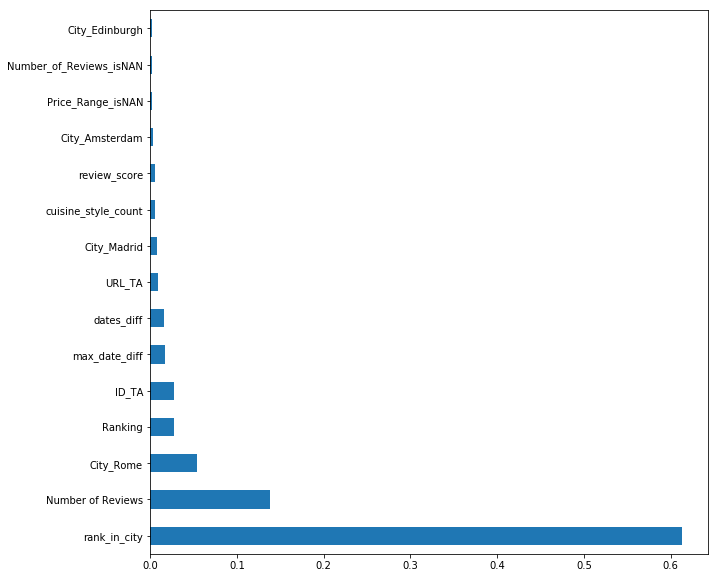

In [298]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

Самым важным признаком оказался нормированный Ranking(rank_in_city),неожиданно в начале списка оказались обработанные поля ID_TA и URL_TA, которые я изначально хотел удалить. Также важными оказались несколько dummy полей и поле с эмоциональным окрасом отзыва, разница между датами написания ревью и максимальной датой написания ревью.

# Submission
Если все устраевает - готовим Submission на кагл

In [299]:
test_data.sample(10)

,Ranking,Number of Reviews,URL_TA,ID_TA,Rating,Cuisine_Style_isNAN,Price_Range_isNAN,Number_of_Reviews_isNAN,Reviews_isNAN,is_multy,...,Albanian,Central Asian,Polynesian,Caucasian,Uzbek,Salvadoran,Xinjiang,Burmese,Fujian,Latvian
7011,3421.0,0.0,187849,10621309,0.0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6205,2216.0,6.0,187331,7133686,0.0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2071,5634.0,6.0,187147,12322297,0.0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1046,310.0,53.0,187331,2014734,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2038,1771.0,4.0,187331,1346381,0.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2516,753.0,32.0,189400,3601247,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6788,1367.0,27.0,190454,1944681,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2314,4358.0,20.0,187514,8867655,0.0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
8311,180.0,171.0,274887,8144949,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8664,2028.0,71.0,187309,958013,0.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [300]:
test_data = test_data.drop(['Rating'], axis=1)

In [301]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [302]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [303]:
predict_submission

array([3.06 , 4.21 , 4.08 , ..., 3.065, 4.515, 4.155])

In [304]:
# округлим
for i in range(predict_submission.size):
        predict_submission[i]=rating_round(predict_submission[i])

In [306]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.0
2,id_2,4.0
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,2.0
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
